In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Transformation into Long Format and read csv data

In [4]:
# Function to transform dataset into a long format
def transform_dataset(df, value_name):
    df_long = df.melt(id_vars=["Entity", "Code"], 
                      var_name="Year", 
                      value_name=value_name)
    df_long["Year"] = df_long["Year"].str.extract('(\d+)').astype(int)
    df_long.dropna(subset=["Year"], inplace=True)
    return df_long

# Function to transform life expectancy data
def transform_life_expectancy(df, sex):
    df_long = df.melt(id_vars=["Entity", "Code", "Year"], 
                      var_name="Age", 
                      value_name="Remaining_Life_Expectancy")
    df_long["Age"] = df_long["Age"].str.extract('Age: (\d+)').astype(int)
    df_long["Sex"] = sex
    return df_long

# Read the datasets
filepaths = {
    "health_expenditure": "data/Current health expenditure.csv",
    "gini_index": "data/Gini index.csv",
    "remaining_life_expectancy_female": "data/remaining-life-expectancy-at-different-ages-females.csv",
    "remaining_life_expectancy_male": "data/remaining-life-expectancy-at-different-ages-males.csv",
    "safe_water": "data/SafeWater.csv",
    "alcohol_consumption": "data/Total alcohol consumption per capita.csv",
    "electricity_access": "data/Access to electricity.csv",
    "electoral_democracy_index": "data/electoral-democracy-index.csv",
    "obesity": "data/obesity.csv",
    "government_expenditure_on_education": "data/total-government-expenditure-on-education-gdp.csv",
    "gdp": "data/gdp.csv",
    "meat_supply_per_person": "data/meat-supply-per-person.csv"
}

dfs = {name: pd.read_csv(filepath) for name, filepath in filepaths.items()}

# Replacing ".." with NaN
for df in dfs.values():
    df.replace("..", np.nan, inplace=True)

# Transforming each dataset
transformed_dfs = {
    "health_expenditure": transform_dataset(dfs["health_expenditure"], "HealthExpenditure"),
    "gini_index": transform_dataset(dfs["gini_index"], "GiniIndex"),
    "safe_water": transform_dataset(dfs["safe_water"], "SafeWater"),
    "alcohol_consumption": transform_dataset(dfs["alcohol_consumption"], "AlcoholConsumption"),
    "electricity_access": transform_dataset(dfs["electricity_access"], "ElectricityAccess"),
    "electoral_democracy_index": transform_dataset(dfs["electoral_democracy_index"], "ElectoralDemocracyIndex"),
    "obesity": transform_dataset(dfs["obesity"], "Obesity"),
    "government_expenditure_on_education": transform_dataset(dfs["government_expenditure_on_education"], "GovEducationExpenditure"),
    "gdp": transform_dataset(dfs["gdp"], "GDP"),
    "meat_supply_per_person": transform_dataset(dfs["meat_supply_per_person"], "MeatSupplyPerPerson")
}

# Merging the transformed datasets
dfs_to_merge = list(transformed_dfs.values())
merged_df = reduce(lambda left, right: pd.merge(left, right, on=["Entity", "Code", "Year"], how="outer"), dfs_to_merge)

# Transforming life expectancy data
female_life_exp_long = transform_life_expectancy(dfs["remaining_life_expectancy_female"], "Female")
male_life_exp_long = transform_life_expectancy(dfs["remaining_life_expectancy_male"], "Male")

# Combining the transformed life expectancy data
life_expectancy_combined = pd.concat([female_life_exp_long, male_life_exp_long], ignore_index=True)

# Merging the life expectancy data with the other variables
final_df = life_expectancy_combined.merge(merged_df, on=["Entity", "Code", "Year"], how="left")

# Rearranging columns
final_columns = ["Entity", "Code", "Year", "Sex", "Age", "HealthExpenditure", "GiniIndex", 
                 "SafeWater", "AlcoholConsumption", "ElectricityAccess", "ElectoralDemocracyIndex", 
                 "Obesity", "GovEducationExpenditure", "GDP", "MeatSupplyPerPerson", "Remaining_Life_Expectancy"]
final_df = final_df[final_columns]

# Displaying the final dataset
print(final_df.sample(15))


KeyError: "The following 'id_vars' are not present in the DataFrame: ['Code', 'Entity']"

In [35]:
# Replacing ".." with NaN
for df in dfs.values():
    df.replace("..", np.nan, inplace=True)


In [36]:
# Transforming each dataset
transformed_dfs = {
    "health_expenditure": transform_dataset(dfs["health_expenditure"], "HealthExpenditure"),
    "gini_index": transform_dataset(dfs["gini_index"], "GiniIndex"),
    "safe_water": transform_dataset(dfs["safe_water"], "SafeWater"),
    "alcohol_consumption": transform_dataset(dfs["alcohol_consumption"], "AlcoholConsumption"),
    "electricity_access": transform_dataset(dfs["electricity_access"], "ElectricityAccess")
}

# Merging the transformed datasets
dfs_to_merge = list(transformed_dfs.values())
merged_df = reduce(lambda left, right: pd.merge(left, right, on=["Entity", "Code", "Year"], how="outer"), dfs_to_merge)

# Transforming life expectancy data
female_life_exp_long = transform_life_expectancy(dfs["remaining_life_expectancy_female"], "Female")
male_life_exp_long = transform_life_expectancy(dfs["remaining_life_expectancy_male"], "Male")

# Combining the transformed life expectancy data
life_expectancy_combined = pd.concat([female_life_exp_long, male_life_exp_long], ignore_index=True)

# Merging the life expectancy data with the other variables
final_df = life_expectancy_combined.merge(merged_df, on=["Entity", "Code", "Year"], how="left")

# Rearranging columns
final_df = final_df[["Entity", "Code", "Year", "Sex", "Age", "HealthExpenditure", "GiniIndex", "SafeWater", "AlcoholConsumption", "ElectricityAccess", "Remaining_Life_Expectancy",]]

# Displaying the final dataset
final_df.sample(15)

,Entity,Code,Year,Sex,Age,HealthExpenditure,GiniIndex,SafeWater,AlcoholConsumption,ElectricityAccess,Remaining_Life_Expectancy
229134,"Less developed regions, excluding least develo...",NaN,2007,Male,45,NaN,NaN,NaN,NaN,NaN,29.3496
154023,Puerto Rico,PRI,2020,Male,0,NaN,NaN,99.8731075904989,NaN,100,73.6443
101774,Bosnia and Herzegovina,BIH,1962,Female,65,NaN,NaN,NaN,NaN,NaN,13.7859
202349,Central African Republic,CAF,1959,Male,25,NaN,NaN,NaN,NaN,NaN,33.9407
55342,Samoa,WSM,2013,Female,15,6.44109249,38.7,61.5138417972115,NaN,97.0029907226563,61.6161
245830,Greenland,GRL,1998,Male,65,NaN,NaN,NaN,NaN,100,11.5479
127050,Honduras,HND,1958,Female,80,NaN,NaN,NaN,NaN,NaN,5.1823
182021,Burundi,BDI,2014,Male,15,7.21081543,NaN,NaN,NaN,7,50.1146
93063,Northern Ireland,NaN,1948,Female,45,NaN,NaN,NaN,NaN,NaN,29.8500
252100,Niue,NIU,1997,Male,65,NaN,NaN,NaN,NaN,NaN,11.7980


### Identifying and Displaying Missing 'Code' Entries

In [37]:
# Filtering to find rows where 'Code' is NaN
nan_code_df = final_df[final_df['Code'].isna()]

# Displaying the rows with NaN 'Code'
print("Rows where 'Code' is NaN:")
print(nan_code_df)

# Showing the count of these rows
print("\nCount of rows with NaN 'Code':", nan_code_df.shape[0])

Rows where 'Code' is NaN:
                               Entity Code  Year     Sex  Age  \
72                        Africa (UN)  NaN  1950  Female    0   
73                        Africa (UN)  NaN  1951  Female    0   
74                        Africa (UN)  NaN  1952  Female    0   
75                        Africa (UN)  NaN  1953  Female    0   
76                        Africa (UN)  NaN  1954  Female    0   
...                               ...  ...   ...     ...  ...   
278111  Upper-middle-income countries  NaN  2017    Male   80   
278112  Upper-middle-income countries  NaN  2018    Male   80   
278113  Upper-middle-income countries  NaN  2019    Male   80   
278114  Upper-middle-income countries  NaN  2020    Male   80   
278115  Upper-middle-income countries  NaN  2021    Male   80   

       HealthExpenditure GiniIndex SafeWater AlcoholConsumption  \
72                   NaN       NaN       NaN                NaN   
73                   NaN       NaN       NaN               

### Cleaning Dataset by Removing Rows with Missing 'Code'

In [38]:
# Removing rows where 'Code' is NaN
final_df = final_df.dropna(subset=['Code'])

# Displaying 15 random rows from the cleaned dataset
final_df.sample(15)

,Entity,Code,Year,Sex,Age,HealthExpenditure,GiniIndex,SafeWater,AlcoholConsumption,ElectricityAccess,Remaining_Life_Expectancy
170853,Micronesia (country),FSM,1980,Male,10,NaN,NaN,NaN,NaN,NaN,55.6176
19991,Afghanistan,AFG,2019,Female,10,14.8313194,NaN,27.4917341128464,0.01618,97.7,61.0166
233306,Paraguay,PRY,1985,Male,45,NaN,NaN,NaN,NaN,NaN,27.9520
174475,Saint Kitts and Nevis,KNA,1974,Male,10,NaN,NaN,NaN,NaN,NaN,53.2020
10586,Madagascar,MDG,1953,Female,0,NaN,NaN,NaN,NaN,NaN,41.4930
258709,World,OWID_WRL,1961,Male,65,NaN,NaN,NaN,NaN,NaN,11.0633
73376,Norway,NOR,2007,Female,25,8.05085373,27.1,99.6373982036877,NaN,100,58.1972
241535,Brunei,BRN,1981,Male,65,NaN,NaN,NaN,NaN,NaN,12.9248
115485,Senegal,SEN,2007,Female,65,3.41496587,NaN,22.0302605560393,NaN,48.1494331359863,13.0813
213530,Philippines,PHL,1987,Male,25,NaN,NaN,NaN,NaN,NaN,44.2720


NaN Counts:
 Entity                            0
Code                              0
Year                              0
Sex                               0
Age                               0
HealthExpenditure            207900
GiniIndex                    231084
SafeWater                    219464
AlcoholConsumption           245154
ElectricityAccess            182658
Remaining_Life_Expectancy         0
dtype: int64

Non-NaN Counts:
 Entity                       256508
Code                         256508
Year                         256508
Sex                          256508
Age                          256508
HealthExpenditure             48608
GiniIndex                     25424
SafeWater                     37044
AlcoholConsumption            11354
ElectricityAccess             73850
Remaining_Life_Expectancy    256508
dtype: int64


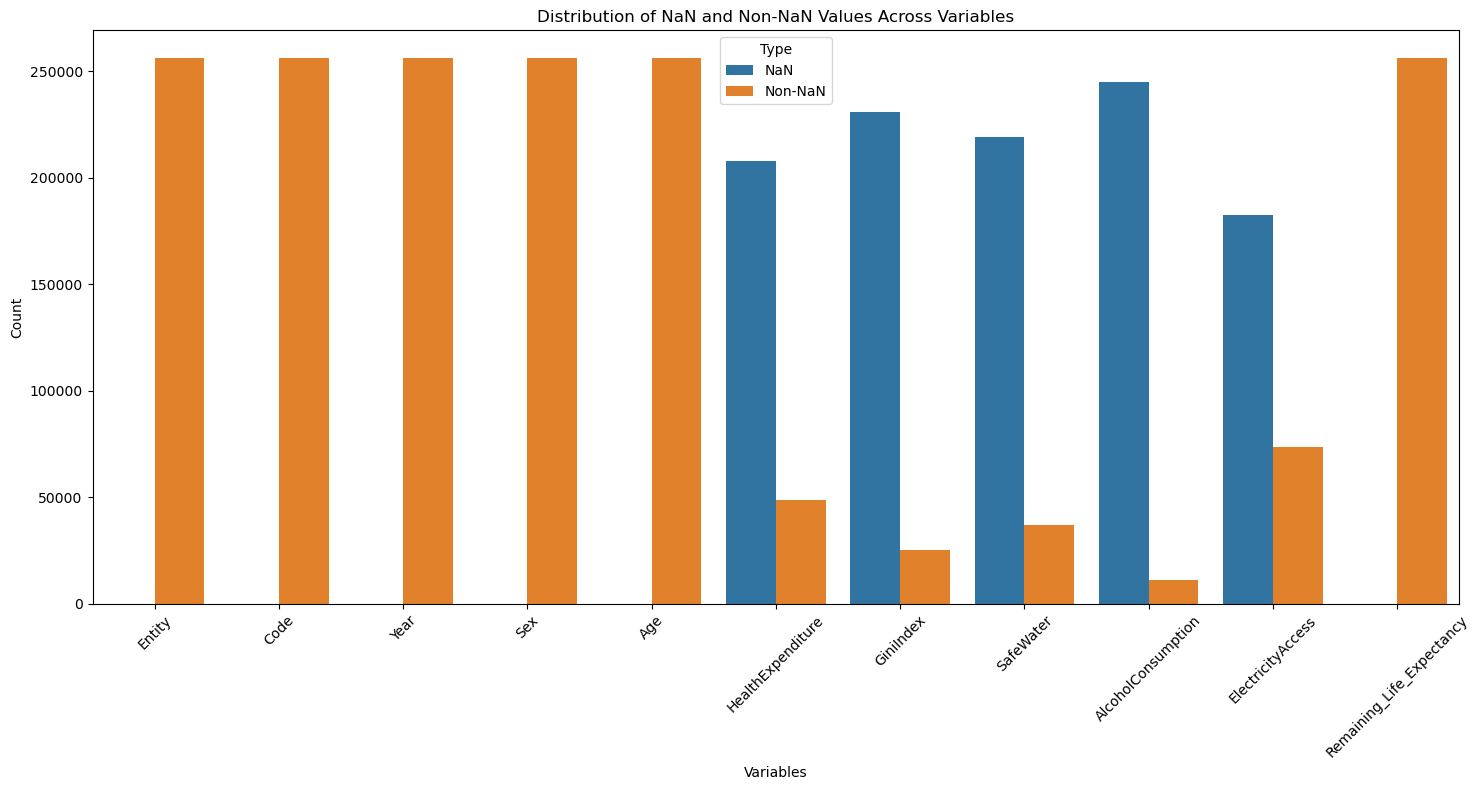


Percentage of NaN values by country:
Entity
Brazil                30.681818
Luxembourg            30.681818
Germany               31.565657
Honduras              31.565657
United States         31.767109
Indonesia             31.818182
Dominican Republic    32.070707
Costa Rica            32.196970
Ireland               32.196970
Moldova               32.323232
dtype: float64
Entity
Anguilla                           45.454545
Bahamas                            45.454545
Bonaire Sint Eustatius and Saba    45.454545
Brunei                             45.454545
Cape Verde                         45.454545
Congo                              45.454545
Cook Islands                       45.454545
Democratic Republic of Congo       45.454545
East Timor                         45.454545
Egypt                              45.454545
dtype: float64


In [47]:
# Calculating the count of NaN and Non-NaN values for each column
nan_count = final_df.isna().sum()
non_nan_count = final_df.notna().sum()

# Printing the counts
print("NaN Counts:\n", nan_count)
print("\nNon-NaN Counts:\n", non_nan_count)

# Creating a DataFrame for visualization
count_df = pd.DataFrame({'NaN': nan_count, 'Non-NaN': non_nan_count})
count_df = count_df.reset_index()
count_df = count_df.melt(id_vars='index', var_name='Type', value_name='Count')

# Visualization using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='index', y='Count', hue='Type', data=count_df)
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Count')
plt.title('Distribution of NaN and Non-NaN Values Across Variables')
plt.tight_layout()
plt.show()

# Calculating the percentage of NaN values by country
total_values_per_country = final_df.groupby('Entity').apply(lambda x: x.size)
nan_values_per_country = final_df.groupby('Entity').apply(lambda x: x.isna().sum().sum())
nan_percentage_per_country = (nan_values_per_country / total_values_per_country) * 100

# Printing the percentage of NaN values by country
print("\nPercentage of NaN values by country:")
print(nan_percentage_per_country.nsmallest(10))
print(nan_percentage_per_country.nlargest(10))


In [50]:
# Basic information about the DataFrame
print(final_df.info())

# Descriptive statistics
print(final_df.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 256508 entries, 0 to 278907
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Entity                     256508 non-null  object 
 1   Code                       256508 non-null  object 
 2   Year                       256508 non-null  int64  
 3   Sex                        256508 non-null  object 
 4   Age                        256508 non-null  int32  
 5   HealthExpenditure          48608 non-null   object 
 6   GiniIndex                  25424 non-null   object 
 7   SafeWater                  37044 non-null   object 
 8   AlcoholConsumption         11354 non-null   object 
 9   ElectricityAccess          73850 non-null   object 
 10  Remaining_Life_Expectancy  256508 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 22.5+ MB
None
                Year            Age  Remaining_Life_Expectancy
count  

### Handling NaN values

In [59]:
# Sample size - adjust as needed
sample_size = 1000  # or a fraction like 0.1 for 10%

# Taking a random sample
sample_df = final_df.sample(n=sample_size, random_state=1)

# List of columns to analyze
columns_to_analyze = ['HealthExpenditure', 'GiniIndex', 'SafeWater', 'AlcoholConsumption', 'ElectricityAccess']
for column in columns_to_analyze:
    final_df[column] = pd.to_numeric(final_df[column], errors='coerce')


#### descriptive statistics

In [60]:
# Calculate descriptive statistics
for column in columns_to_analyze:
    print(f"{column} Statistics:\n")
    print(final_df[column].describe())
    print("\nSkewness:", final_df[column].skew())
    print("Kurtosis:", final_df[column].kurtosis())
    print("-" * 50)


HealthExpenditure Statistics:

count    48608.000000
mean         6.357330
std          2.841384
min          1.263576
25%          4.179856
50%          5.924232
75%          8.119487
max         24.230680
Name: HealthExpenditure, dtype: float64

Skewness: 1.0684203060994706
Kurtosis: 2.413438579436691
--------------------------------------------------
GiniIndex Statistics:

count    25424.000000
mean        38.049504
std          9.051957
min         20.700000
25%         31.275000
50%         35.700000
75%         43.700000
max         65.800000
Name: GiniIndex, dtype: float64

Skewness: 0.7024754617946778
Kurtosis: -0.3058581437311241
--------------------------------------------------
SafeWater Statistics:

count    37044.000000
mean        67.705278
std         31.297778
min          1.430447
25%         43.304206
50%         79.199787
75%         96.667232
max        100.000000
Name: SafeWater, dtype: float64

Skewness: -0.6233597561611443
Kurtosis: -1.0272917324208237
----------

Which Imputation makes sense:

HealthExpenditure:

Right-skewed with significant outliers.
Median. The median is less sensitive to outliers and skewness, making it suitable for right-skewed data.

GiniIndex:

Slightly right-skewed with fewer outliers.
Median or Mean. Given the mild skewness, both mean and median could be viable

SafeWater:

Left-skewed with fewer extreme values.
Median. The median is more appropriate for left-skewed data and will not be affected by the lower end of the distribution.

AlcoholConsumption:

Slightly right-skewed but not heavily.
Median. While the skewness is mild, the median will still likely provide a more robust measure for imputation due to the variability.

ElectricityAccess:

Strongly left-skewed.
Median or potentially a high percentile (like 75th or 90th percentile) if you want to capture the high access rate in most countries. The median is less influenced by the few countries with very low access. But we stick with meadian for the sake of simplicity

### Imputation

In [64]:
# Copying the original DataFrame
imputed_df = final_df.copy()

# Applying median imputation to the new DataFrame
imputed_df['HealthExpenditure'].fillna(imputed_df['HealthExpenditure'].median(), inplace=True)
imputed_df['GiniIndex'].fillna(imputed_df['GiniIndex'].median(), inplace=True)
imputed_df['SafeWater'].fillna(imputed_df['SafeWater'].median(), inplace=True)
imputed_df['AlcoholConsumption'].fillna(imputed_df['AlcoholConsumption'].median(), inplace=True)
imputed_df['ElectricityAccess'].fillna(imputed_df['ElectricityAccess'].median(), inplace=True)

imputed_df.info()
imputed_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 256508 entries, 0 to 278907
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Entity                     256508 non-null  object 
 1   Code                       256508 non-null  object 
 2   Year                       256508 non-null  int64  
 3   Sex                        256508 non-null  object 
 4   Age                        256508 non-null  int32  
 5   HealthExpenditure          256508 non-null  float64
 6   GiniIndex                  256508 non-null  float64
 7   SafeWater                  256508 non-null  float64
 8   AlcoholConsumption         256508 non-null  float64
 9   ElectricityAccess          256508 non-null  float64
 10  Remaining_Life_Expectancy  256508 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 22.5+ MB


,Entity,Code,Year,Sex,Age,HealthExpenditure,GiniIndex,SafeWater,AlcoholConsumption,ElectricityAccess,Remaining_Life_Expectancy
0,Afghanistan,AFG,1950,Female,0,5.924232,35.7,79.199787,5.00744,99.14505,28.3905
1,Afghanistan,AFG,1951,Female,0,5.924232,35.7,79.199787,5.00744,99.14505,28.6345
2,Afghanistan,AFG,1952,Female,0,5.924232,35.7,79.199787,5.00744,99.14505,29.1260
3,Afghanistan,AFG,1953,Female,0,5.924232,35.7,79.199787,5.00744,99.14505,29.6212
4,Afghanistan,AFG,1954,Female,0,5.924232,35.7,79.199787,5.00744,99.14505,29.9004
